In [1]:
import autograd.numpy as np
from autograd import grad
from autograd import elementwise_grad
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
%matplotlib inline

nx = 10
dx = 1. / nx
x_space = np.linspace(0, 2, nx)   

In [2]:
#potential field
V1 = np.poly1d([1, 5, 16])

#Total energy
E = 1.0

#to find the roots where E=V, p.r
p = E-V1


def V(x):
    return x*x

#TISE
def f(x, psy, dpsy):
    '''
        d2(psy)/dx2 = f(x, dpsy/dx, psy)
        This is f() function on the right
    '''
    return psy*(E-V(x))

#*2*m/(h*h)

In [3]:
#neural_network
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

#layer1
def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

#layer2
def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

In [4]:
#trial function
def psy_trial(xi, net_out):
    #return (xi-p.r[0])*(xi-p.r[1])*net_out
    return (xi-1)*net_out

#gradient of trial function
psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)

In [5]:
def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

In [6]:
#weights
W = [npr.randn(1, 10), npr.randn(10, 1)]

lmb = 0.001

for i in range(10):
    loss_grad =  grad(loss_function)(W, x_space)
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    print (W[0])
    print (loss_grad[0])


C:\Users\shilpi jain\Anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


[[ 1.57857441 -0.48302499 -0.91631288  1.77928947  0.25480739  1.11905221
   0.09097284  0.07513984  0.27612885 -0.42880613]]
[[ 5.47645999 33.29735738 -2.77531151 -3.94985042 33.39417324  9.14266993
  -9.10800173 13.01219427 -7.40057126  9.35371033]]
[[ 1.57403343 -0.51058581 -0.91378623  1.78284175  0.22637498  1.1115077
   0.09953427  0.06464719  0.28326392 -0.43642303]]
[[ 4.54098708 27.56082093 -2.52664879 -3.55228319 28.43241304  7.54451383
  -8.56142417 10.4926538  -7.13507005  7.61690339]]
[[ 1.57025028 -0.53355478 -0.91150263  1.7860182   0.20214057  1.10525599
   0.10745399  0.05612991  0.28998153 -0.44267245]]
[[ 3.78314744 22.96897137 -2.28359721 -3.17644618 24.23440561  6.25170466
  -7.91972019  8.51727803 -6.71760979  6.24941683]]
[[ 1.56708503 -0.55280615 -0.90945098  1.78884591  0.18146091  1.10005545
   0.11469219  0.04917478  0.29619963 -0.44783258]]
[[ 3.16524908 19.25137375 -2.05164845 -2.82771166 20.67966214  5.20053877
  -7.23820572  6.95512751 -6.21810806  5.1601

In [9]:
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 

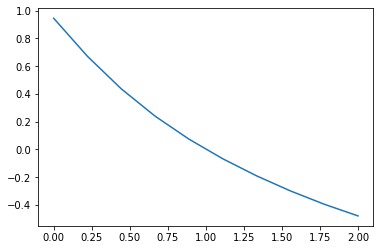

In [11]:
plt.figure()
plt.plot(x_space, res)
plt.show()
